<a href="https://colab.research.google.com/github/StefanoSassy/Intro-al-Gradiente-Descendente/blob/main/M%C3%A9todo_del_Gradiente_decendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método del Gradiente decendente y una introducción a redes neuronales.

Imaginemos la siguiente situación: le preguntamos a 23 personas que completen la frase "La vida es...". Una persona completo la frase con "una tómbola", 7 personas con "bella", 2 personas con "única", 6 personas con "fabulosa", 3 personas con "para vivirla" y 4 personas con "magía". Nos interesa saber que pasaría se le preguntamos a 1000 personas completar la frase. Para ello generaremos una red neuronal cuya manera de aprender será usando el método del gradiente decendente.

Antes de continuar preparemos los datos, la frase inicial de daremos el peso de 1, que corresponde a un 100% de probabilidad de ser dicha, como es lo esperado. Las respuestas las acomodamos como matriz [1,7,2,6,3,4] usando numpy, contamos el total de respuestas y con ella la probabilidad "real" de cada respueta. Usaremos los valores iniciales como peso y los normalizaremos con la función sigmoide.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (frase inicial con probabilidad 1)
x_input = np.array([1])

# Opciones de salida con frecuencias observadas (puedes modificar estos valores)
response_counts = np.array([1, 7, 2, 6, 3, 4])  # "una tómbola", "bella", "única", " fabulosa", "para vivirla", "magía"
total_responses = np.sum(response_counts)

# Pesos iniciales basados en frecuencias relativas
y_true = response_counts / total_responses  # Normalización para obtener probabilidades
weights_hidden = response_counts.astype(np.float32)  # Usamos los valores iniciales como pesos
bias_hidden = -1  # Sesgo


Aquí empieza la teoría y el cómo modelar la red neuronal.

Para las frases "una tómbola" y la frase "para vivirla". ¿Cómo se activan las neuronas de la siguiente capa? Para la neurona asociada por "una tómbola" hacemos la siguiente composición de funciones $f(x)=wx+b$ y la función sigmoide $\sigma(x)=\frac{1}{1+e^{-x}}$, es decir,
$$(\sigma \circ f)(x)=\frac{1}{1+e^{-(wx+b)}}.$$
Supongamos que cada palabra u oración tiene un 100% de probabilidad de ser dicha, pues no podemos sospechar lo contrario, modificamos el sesgo (bias) $b=-1$, esto para que la frase que creemos que tiene la menor probabilidad de ser dicha active lo menos posible su neurona en la siguiente capa:
1. Para frase "una tómbola" tenemos: $(\sigma \circ f)(1)=\frac{1}{1+e^{-(1(1)-1)}}=\frac{1}{2}=0.5.$

2. Para la frase "para vivirla" tenemos: $(\sigma \circ f)(1)=\frac{1}{1+e^{-(3(1)-1)}}\approx 0.8808$.

En este caso la segunda frase tiene mas posibilidades de activar su neurona asociada que la primer frase.

In [ ]:
# Función sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

Para entender el descenso del gradiente necesitamos entender la derivada de una función primero en una dimensión para poco a poco generalizarlo a mas dimensiones. Si tenemos una función $f:Ω⊆ \mathbb{R} \rightarrow \mathbb{R}$, la derivada en un punto $x_0 \in Ω$ es el valor de la pendiente de la recta tangente a $f$ en $x_0$, es decir, $y=f'(x_0)x+b$. Recordemos que dada la ecuación general de una recta $\ell: Ax+By+C=0$, el vector ortogonal a la recta es $n=(A,B)$. Así, en nuestra recta tangente el vector ortogonal es $n=(f'(x_0), -1)$, lo que hace al vector de dirección de la recta $v=(1,f'(x_0))$.

Aquí tenenmos una observación importante, el vector $v$ siempre apuntará a la dirección positiva del eje $x$, el valor de la derivada es quien moverá al vector dependiendo del valor de la pendiente.

Mounted at /content/drive


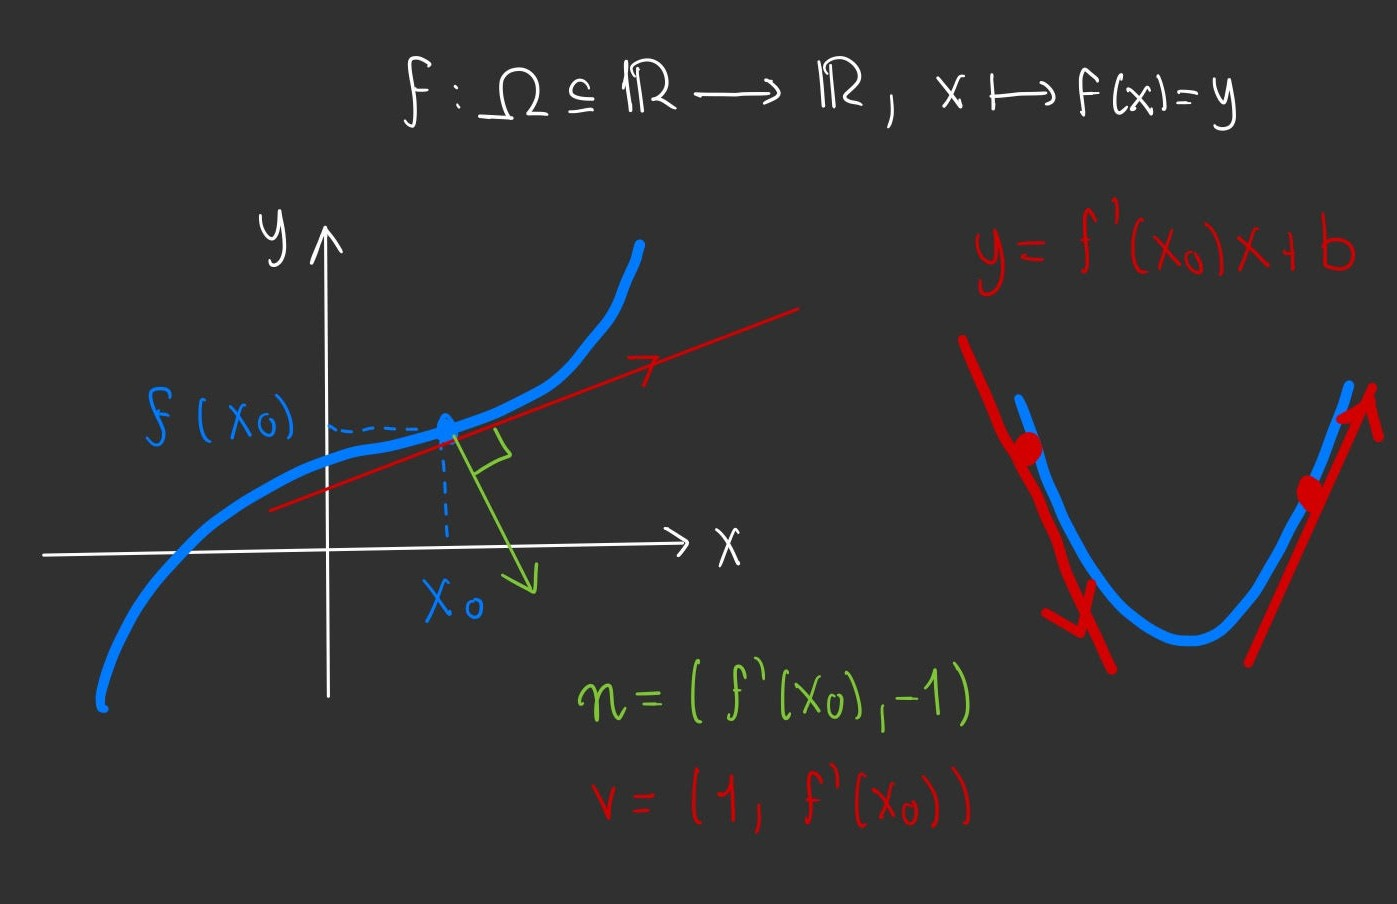

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from IPython.display import Image, display, HTML

display(HTML("<div style='text-align: center;'>"))
display(Image(filename='/content/drive/My Drive/Math_images/vector_derivada.jpg', width=500, height=400))
display(HTML("</div>"))




<img src="https://github.com/StefanoSassy/Intro-al-Gradiente-Descendente/blob/main/vector_derivada.jpg?raw=true" width="400">

In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.1
iterations = 1000
mse_history = []

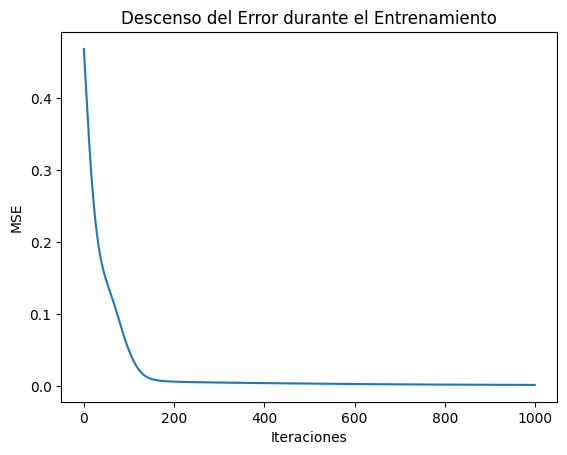

Pesos finales: [0.7847621 4.6964293 1.7183349 4.4911833 2.9113548 3.9182107]
Sesgo final: -5.4797257171392975


In [ ]:


# Entrenamiento con gradiente descendente
for _ in range(iterations):
    # Cálculo de la salida de la capa oculta
    z_hidden = weights_hidden * x_input + bias_hidden
    a_hidden = sigmoid(z_hidden)

    # Cálculo del error
    error = y_true - a_hidden
    mse = np.mean(error ** 2)
    mse_history.append(mse)

    # Backpropagation (ajuste de pesos)
    gradient = 2*error * sigmoid_derivative(z_hidden)
    weights_hidden += learning_rate * gradient * x_input
    bias_hidden += learning_rate * np.sum(gradient)

# Visualización del error
plt.plot(mse_history)
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Descenso del Error durante el Entrenamiento')
plt.show()

# Resultados finales
print("Pesos finales:", weights_hidden)
print("Sesgo final:", bias_hidden)